# Week 04 Exercises 

## 4.1

Let's start with some basic practice using the **shapely** package. Do the following steps:


<ol type="a">
  <li>Creat a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890,(-118.4142,33.96990,9-118.4152,33.9699)</li>
  <li>Create a new variable that stores both x and y coordinates</li>
  <li>What is the centroid of this polygon?</li>
  <li>What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.</li>
</ol>


In [38]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon
import numpy as np

In [39]:
# Create a Polygon from the coordinates
p1 = (-118.4152,33.9699)
p2 = (-118.4152,33.9689)
p3 = (-118.4144,33.9689)
p4 = (-118.4143,33,9689)
p5 = (-118.4152,33.9699)

poly = Polygon([p1,p2,p3,p4,p5])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Let's see how our Polygon looks like
print('poly:', poly)
print("Geometry type as text:", poly_type)

poly: POLYGON ((-118.4152 33.9699, -118.4152 33.9689, -118.4144 33.9689, -118.4143 33, -118.4152 33.9699))
Geometry type as text: Polygon


In [41]:
#make polygon into points
point1 = Point(-118.4152,33.9699)
point2 = Point(-118.4152,33.9689)
point3 = Point(-118.4144,33.9689)
point4 = Point(-118.4143,33,9689)
point5 = Point(-118.4152,33.9699)

In [43]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [46]:
# Create variable that stores both
xy_storage = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

# Print out
print("Combined Variable:\n", xy_storage, "\n")

Combined Variable:
 (array('d', [-118.4152]), array('d', [33.9699])) 



In [47]:
#centroid of the polygon
poly_centroid = poly.centroid
print(poly.centroid)

POINT (-118.41463302334394 33.64593294584657)


In [48]:
#bounding box
poly_bbox = poly.bounds
print(poly.bounds)

(-118.4152, 33.0, -118.4143, 33.9699)


A bounding box is a two-dimensional object that encloses all of the points within its boundaries. For this polygon, the bounding box output is a coordinate that encapsulates all the points of the polygon.

## 4.2



Complete the following tasks:

<ol type="a">
  <li>Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson' </li>
  <li>What is the default CRS? Write a sentence about what type of CRS it is.</li>
  <li>Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:

  - What is the size of the dataframe?
  - List the column names.
  - Show the first 10 rows of the dataframe. </li>
  <li>Make a copy of the dataframe. 

  - Reproject the CRS is epsg:3857
  - Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles
  - Write a few sentences of differences you see in the visualizations between the two.  </li>
</ol>


In [18]:
#load the dataset as a geopandas dataframe
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [19]:
#default coordinate reference system
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**This is an EPSG:4326 coordinate system. This means it is a European Petroleum Survey Group number. The name is a WGS84, which means it is a coordinate system in terms of decimal degrees (i.e. latitudes and longitudes)**

In [50]:
#what is the size of the dataframe?
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         281 non-null    int64   
 1   zip              281 non-null    object  
 2   jenicategory     281 non-null    object  
 3   jenipctl         281 non-null    float64 
 4   jenirank         281 non-null    int64   
 5   riskcategory     281 non-null    object  
 6   riskpctl         281 non-null    float64 
 7   driverscategory  281 non-null    object  
 8   driverspctl      281 non-null    float64 
 9   systemcategory   281 non-null    object  
 10  systempctl       281 non-null    float64 
 11  neighborhood     281 non-null    object  
 12  sup_dist         280 non-null    object  
 13  spa              280 non-null    object  
 14  csa              278 non-null    object  
 15  SHAPE_Length     281 non-null    float64 
 16  SHAPE_Area       281 non-null    flo

In [53]:
#List the column names
for col in data.columns:
    print(col)

OBJECTID
zip
jenicategory
jenipctl
jenirank
riskcategory
riskpctl
driverscategory
driverspctl
systemcategory
systempctl
neighborhood
sup_dist
spa
csa
SHAPE_Length
SHAPE_Area
geometry


In [54]:
#show the first 10 rows of the dataframe
data.head(10)

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
5,6,90077,Lowest,1.8,272,Lowest,2.5,Lowest,13.6,Lowest,1.4,Bel-Air,District 3,SPA 5 - West,Los Angeles - Bel Air,0.268660,0.001831,"MULTIPOLYGON (((-118.45549 34.13449, -118.4555..."
6,7,91436,Lowest,2.2,271,Lowest,10.4,Lowest,5.4,Lowest,2.5,Encino,District 3,SPA 2 - San Fernando,Los Angeles - Encino,0.232985,0.001614,"MULTIPOLYGON (((-118.49296 34.18609, -118.4929..."
7,8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,District 2,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306,"MULTIPOLYGON (((-118.40129 33.98378, -118.4008..."
8,9,91007,Lowest,2.9,269,Lowest,3.2,Lowest,10.0,Lowest,6.9,Arcadia,District 5,SPA 3 - San Gabriel,City of Arcadia,0.212972,0.001380,"MULTIPOLYGON (((-118.05051 34.14841, -118.0500..."
9,10,90049,Lowest,3.3,268,Lowest,13.6,Lowest,2.5,Lowest,4.3,Brentwood,District 3,SPA 5 - West,Los Angeles - Brentwood,0.395030,0.003870,"MULTIPOLYGON (((-118.48933 34.13154, -118.4886..."


In [56]:
#make a copy of the dataframe
dataframe_copy = data.copy()

In [59]:
#Reproject the CRS is epsg:3857
data2 = data.to_crs("EPSG:3857")
data2.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

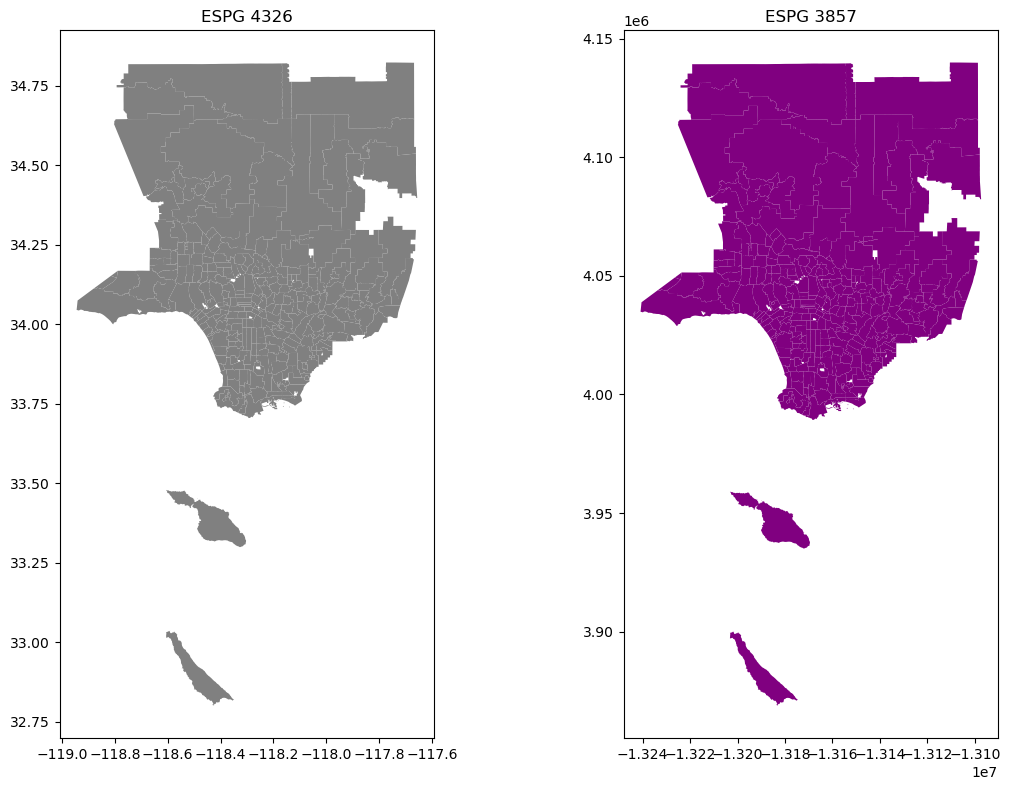

In [62]:
#Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS 
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
dataframe_copy.plot(ax=ax1, facecolor='gray');

# Set title
ax1.set_title("ESPG 4326");

# Plot the new ESPG 3857
data2.plot(ax=ax2, facecolor='purple');

# Set title
ax2.set_title("ESPG 3857");

# Remove empty white space around the plot
plt.tight_layout()

**The x and y values are significantly different. The ESPG 4326 uses typical latitude and longitude values where the ESPG 3857 uses values much lower. Additionally, the ESPG 4326 has more points on the y axis than the ESPG 3857**